<a href="https://colab.research.google.com/github/rohithsivapuram/IKSHANA/blob/main/enhancement1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/soumik12345/MIRNet
%cd MIRNet

In [ ]:
!pip install -q wandb

In [ ]:
from glob import glob
from PIL import Image
from matplotlib import pyplot as plt
from mirnet.inference import Inferer
from mirnet.utils import download_dataset, plot_result

import tensorflow as tf
import numpy as np
print(tf.__version__)

In [ ]:

inferer = Inferer()
inferer.download_weights('1sUlRD5MTRKKGxtqyYDpTv7T3jOW6aVAL')
inferer.build_model(
    num_rrg=3, num_mrb=2, channels=64,
    weights_path='low_light_weights_best.h5'
)
inferer.model.summary()

In [ ]:
inferer.model.save('mirnet')

In [ ]:
IMAGE_LOC = '/content/rop5.jpeg'

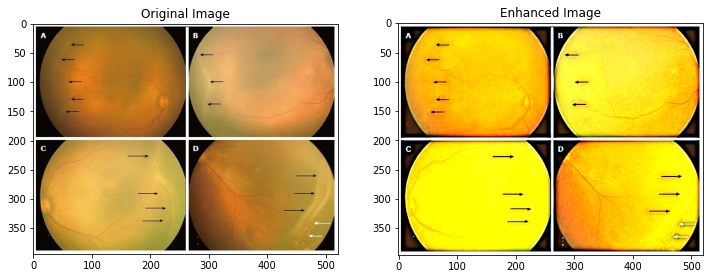

In [ ]:
original_image, output_image = inferer.infer(IMAGE_LOC)
plot_result(original_image, output_image)

In [ ]:
!pip install anvil-uplink

In [ ]:
import cv2
import numpy as np
img = '/content/fundus.jpeg'
image = cv2.imread(img)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
value = 42 #whatever value you want to add
cv2.add(hsv[:,:,2], value, hsv[:,:,2])
image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite('out.png', image)
image= cv2.add(image,np.array([-50.0]))
cv2_imshow(image)

    

Cloning into 'MIRNet'...
remote: Enumerating objects: 248, done.
remote: Counting objects: 100% (248/248), done.
remote: Compressing objects: 100% (191/191), done.
remote: Total 248 (delta 113), reused 166 (delta 46), pack-reused 0
Receiving objects: 100% (248/248), 28.12 MiB | 16.96 MiB/s, done.
Resolving deltas: 100% (113/113), done.
/content/MIRNet/MIRNet/MIRNet/MIRNet/MIRNet/MIRNet/MIRNet/MIRNet/MIRNet/MIRNet/MIRNet/MIRNet


Downloading...
From: https://drive.google.com/uc?id=1sUlRD5MTRKKGxtqyYDpTv7T3jOW6aVAL
To: /content/MIRNet/MIRNet/MIRNet/MIRNet/MIRNet/MIRNet/MIRNet/MIRNet/MIRNet/MIRNet/MIRNet/MIRNet/low_light_weights_best.h5
148MB [00:01, 147MB/s]


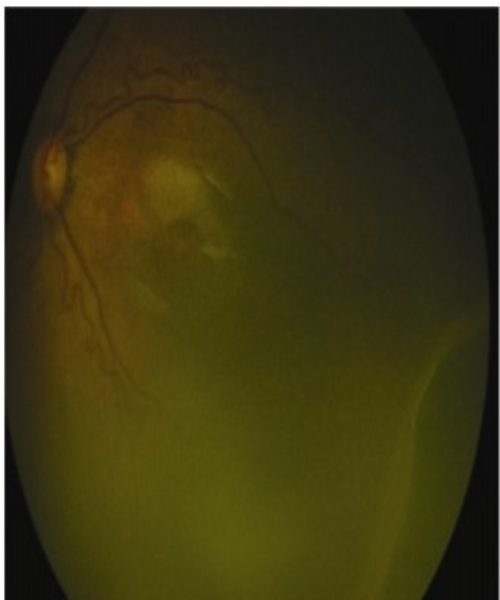

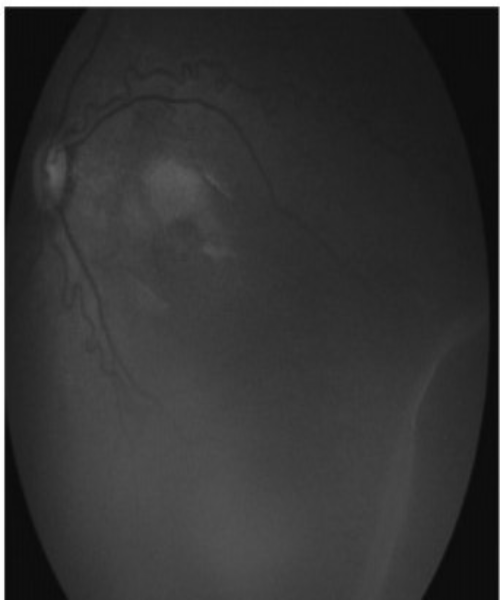

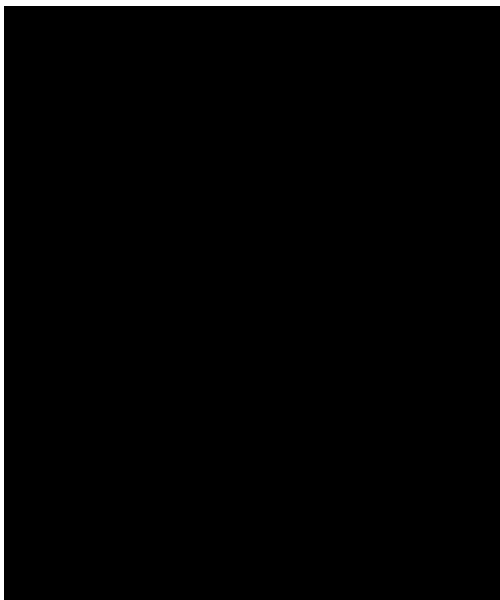

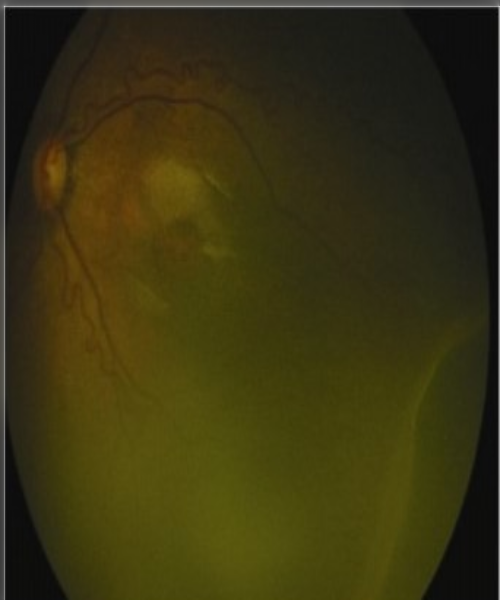

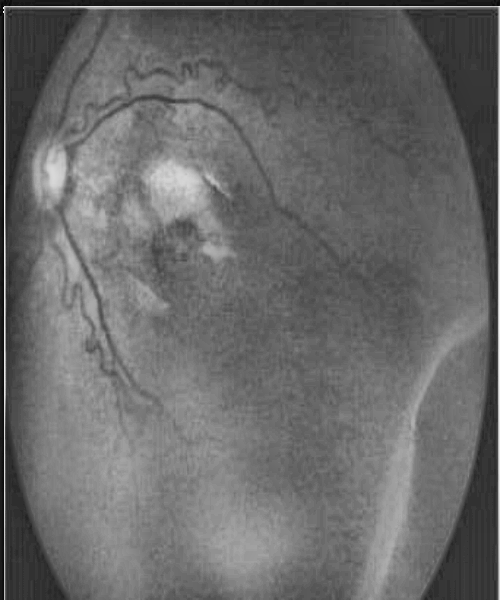

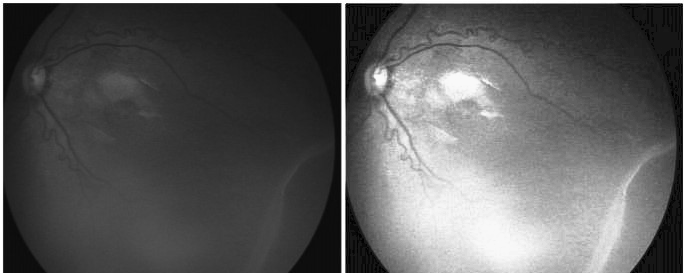

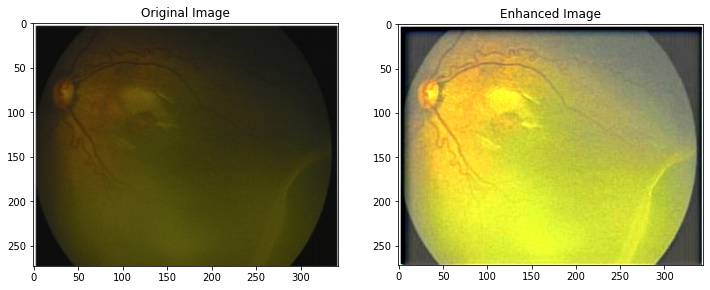

-1

In [ ]:
!git clone https://github.com/soumik12345/MIRNet
%cd MIRNet
!pip install -q wandb
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from glob import glob
from PIL import Image , ImageEnhance
from matplotlib import pyplot as plt
from mirnet.inference import Inferer
from mirnet.utils import download_dataset, plot_result

import tensorflow as tf
inferer = Inferer()
inferer.download_weights('1sUlRD5MTRKKGxtqyYDpTv7T3jOW6aVAL')
inferer.build_model(
    num_rrg=3, num_mrb=2, channels=64,
    weights_path='low_light_weights_best.h5'
)

x = '/content/retinapoor.jpeg'
img = cv2.imread('/content/retinapoor.jpeg')
img1 = cv2.resize(img, (500,600))
img2 = cv2.imread(x,0)
equ = cv2.equalizeHist(img2)
res = np.hstack((img2,equ)) 
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
mask = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY)[1]
result = cv2.inpaint(img1, mask, 40, cv2.INPAINT_TELEA) 
clahe = cv2.createCLAHE(clipLimit = 5)
final_img = clahe.apply(gray) + 30
_, ordinary_img = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY)
cv2.imwrite("retina_mask.jpeg", mask)
cv2.imwrite("retina_inpaint.jpeg", result)
cv2_imshow(img1)
cv2_imshow(gray)
cv2_imshow(mask)
cv2_imshow(result)
cv2_imshow(final_img)
cv2.imwrite('res.png',res)
cv2_imshow(res)
IMAGE_LOC = '/content/retinapoor.jpeg'
original_image, output_image = inferer.infer(IMAGE_LOC)
plot_result(original_image, output_image)

cv2.waitKey(0)